<a href="https://colab.research.google.com/github/Dineshkumar-Anbalagan/Udacity-Predictive-Analytics-Nanodegree-Projects-Python/blob/main/Project_2_Predicting_Catalog_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT-2**

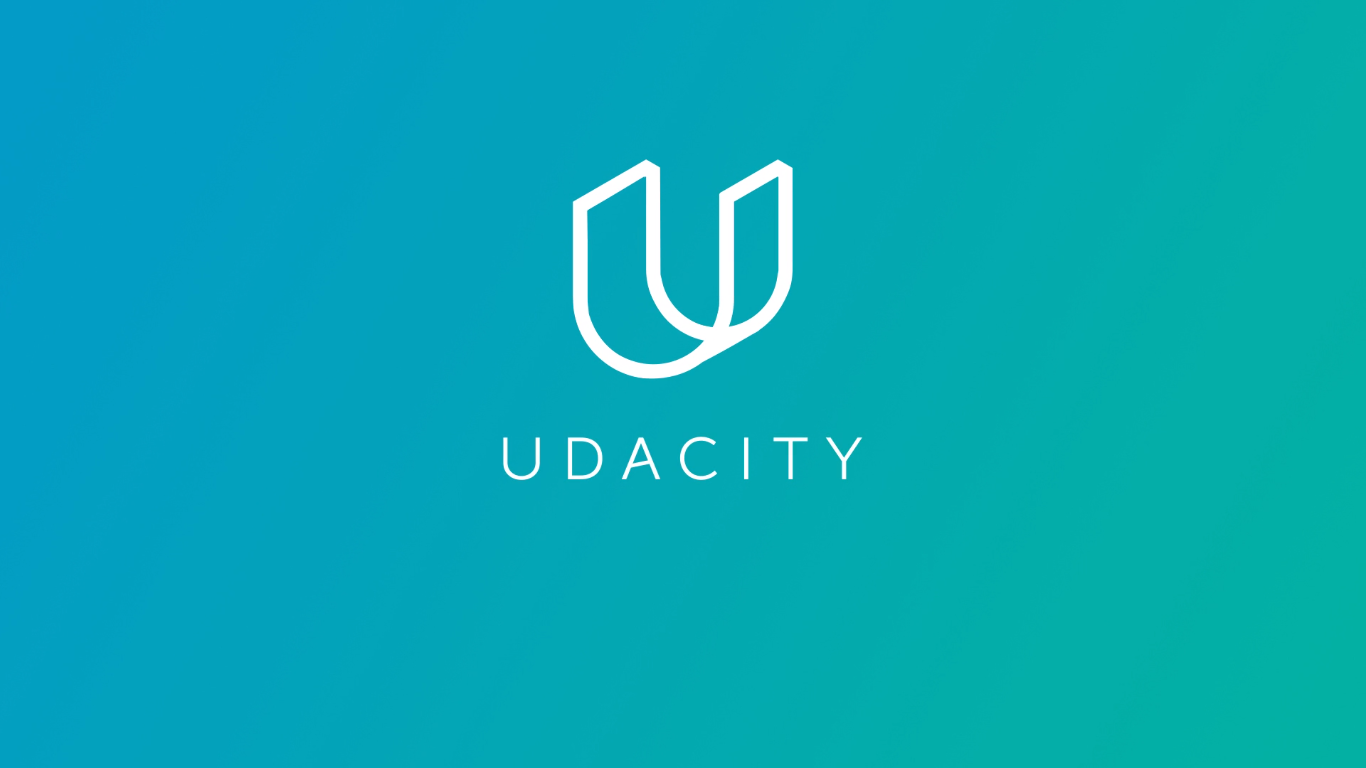

#### **PROJECT DETAILS**
##### **PROJECT OVERVIEW**

In this project, you will analyze a business problem in the mail-order catalog business. You're tasked with predicting how much money your company can expect to earn from sending out a catalog to new customers. This task will involve building the model and applying the results in order to provide a recommendation to management.

**How do I Complete this Project?**

This project uses skills learned throughout our "Problem Solving with Advanced Analytics” course. To complete this project:

Go through the course.

*   Apply the skills learned in the course to solve the business problem given in the project details section.
*   Use our guidelines and rubric to help build your project.
*   When you're ready, submit it to us for review using the submission template found in the supporting materials section.

**Note:** Depending on your experience, you may not need to take the whole course to complete this project.

**Skills Required**

In order to complete this project, you must be able to:

Build a linear regression model and apply the results to a business problem.


**THE BUSINESS PROBLEM**

You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000.

**Details**

The costs of printing and distributing is 6.50 per catalog.

The average gross margin (price - cost) on all products sold through the catalog is 50%.

Make sure to multiply your revenue by the gross margin first before you subtract out the $6.50 cost when calculating your profit.

Write a short report with your recommendations outlining your reasons why the company should go with your recommendations to your manager.

**Steps to Success**

**Step 1:** Business and Data Understanding

Your project should include:

A description of the key business decisions that need to be made.
Note: Clean data is provided for this project, so you can skip the data preparation step of the Problem Solving Framework.

**Step 2:** Analysis, Modeling, and Validation

Build a linear regression model, then use it to predict sales for the 250 customers. We encourage you to use Alteryx to build the best linear model with your data.

**Note:** For students using software other than Alteryx, if you decide to use Customer Segment as one of your predictor variables, please set the base case to Credit Card Only.

However, feel free to use any tool you’d like. You should create your linear regression model and come up with a linear regression equation.

Once you have your linear regression equation, you should use your linear regression equation to predict sales for the individual people in your mailing list.

**Step 3:** Writeup

Once you have your predicted or expected profit, write a brief report with your recommendation to whether the company should send the catalog or not.
Hint: We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. For example, if a customer were to buy from us, we predict this customer will buy $450 worth of products. At a 30% chance that this person will actually buy from us, we can expect revenue to be 450 dollars x 30% = 135 dollars.

In [1]:
#Importing Standard Data Manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Linear Regression & Data Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Importing Datasets from Directory
train = pd.read_excel("/content/p1-customers.xlsx")
test = pd.read_excel("/content/p1-mailinglist.xlsx")

In [3]:
#Train dataset
train.head(3)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3


In [4]:
#Test dataset
test.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [5]:
test.tail(2)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251
249,Yvette Kent,Credit Card Only,762,1071 Worchester St,Aurora,CO,80011,100,5,0.5,0.796350,0.203650


In [6]:
#Columns in train and test dataset
print(train.columns)
print(test.columns)

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', '#_Years_as_Customer'],
      dtype='object')
Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased',
       '#_Years_as_Customer', 'Score_No', 'Score_Yes'],
      dtype='object')


In [7]:
train['City'].unique()

array(['Denver', 'Greenwood Village', 'Centennial', 'Lakewood', 'Arvada',
       'Broomfield', 'Aurora', 'Englewood', 'Westminster', 'Northglenn',
       'Littleton', 'Parker', 'Superior', 'Thornton', 'Brighton',
       'Golden', 'Wheat Ridge', 'Castle Pines', 'Highlands Ranch',
       'Edgewater', 'Commerce City', 'Boulder', 'Morrison', 'Lafayette',
       'Louisville', 'Henderson', 'Lone Tree'], dtype=object)

In [8]:
train['Customer_Segment'].unique()

array(['Store Mailing List', 'Loyalty Club and Credit Card',
       'Loyalty Club Only', 'Credit Card Only'], dtype=object)

In [9]:
#Converting categorical data to Numerical data
df_train = train
df_test = test

#For one hot encoding
df_train1 = train
df_test1 = test

### **METHOD_1:**
Converting Categorical Data to Numerical Data

In [10]:
dicti = {'Store Mailing List':1, 'Loyalty Club and Credit Card':2,
       'Loyalty Club Only':3, 'Credit Card Only':4}
df_train = df_train.replace({"Customer_Segment": dicti})
df_test = df_test.replace({"Customer_Segment": dicti})

In [11]:
dicti = {'Denver':1, 'Greenwood Village':2, 'Centennial':3, 'Lakewood':4, 'Arvada':5,
       'Broomfield':6, 'Aurora':7, 'Englewood':8, 'Westminster':9, 'Northglenn':10,
       'Littleton':11, 'Parker':12, 'Superior':13, 'Thornton':14, 'Brighton':15,
       'Golden':16, 'Wheat Ridge':17, 'Castle Pines':18, 'Highlands Ranch':19,
       'Edgewater':20, 'Commerce City':21, 'Boulder':22, 'Morrison':23, 'Lafayette':24,
       'Louisville':25, 'Henderson':26, 'Lone Tree':27}
df_train = df_train.replace({"City": dicti})
df_test = df_test.replace({"City": dicti})

In [12]:
df_train.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', '#_Years_as_Customer'],
      dtype='object')

In [13]:
sns.set_theme()

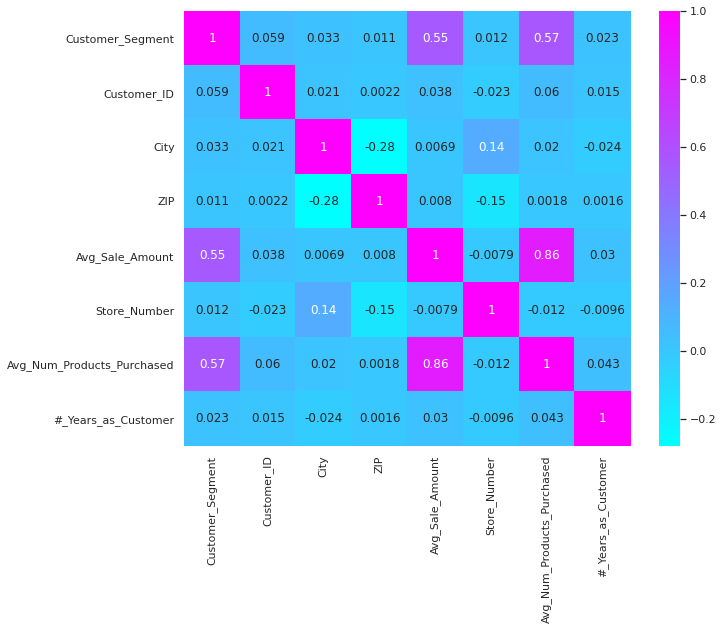

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df_train.corr(), annot=True, cmap = 'cool')

Text(0, 0.5, 'Avg_Sale_Amount')

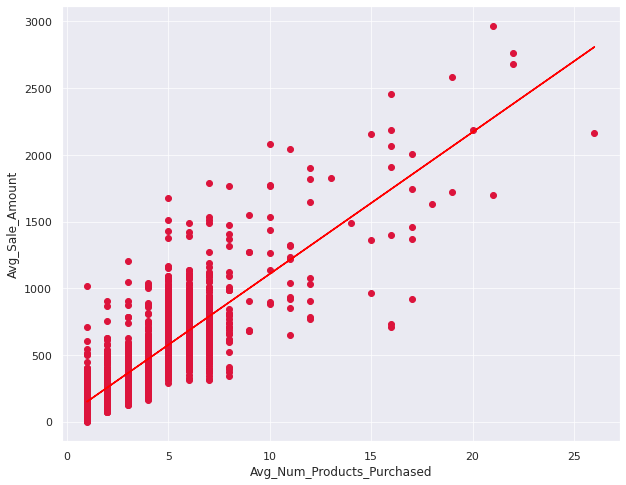

In [15]:
X1 = df_train[[
       'Avg_Num_Products_Purchased'
       ]]
Y1 = df_train['Avg_Sale_Amount']

plt.figure(figsize = (10,8))
regressor = LinearRegression()
regressor.fit(X1,Y1)
regline=regressor.coef_*X1+regressor.intercept_
plt.scatter(X1,Y1,COLOR='crimson')
plt.plot(X1,regline, color='red')
plt.grid(alpha=0.7)
plt.xlabel("Avg_Num_Products_Purchased")
plt.ylabel("Avg_Sale_Amount")

Text(0, 0.5, 'Avg_Sale_Amount')

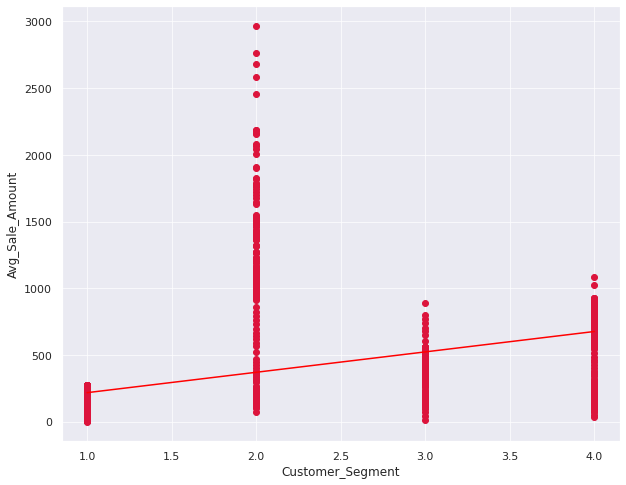

In [16]:
X2 = df_train[[
       'Customer_Segment'
       ]]
Y2 = df_train['Avg_Sale_Amount']

plt.figure(figsize=(10,8))
regressor = LinearRegression()
regressor.fit(X2,Y2)
regline=regressor.coef_*X2+regressor.intercept_
plt.scatter(X2,Y2,COLOR='crimson')
plt.plot(X2,regline, color='red')
plt.grid(alpha=0.7)
plt.xlabel("Customer_Segment")
plt.ylabel("Avg_Sale_Amount")

In [17]:
X3 = df_train[[
       'Customer_Segment',
       'Avg_Num_Products_Purchased'
       ]]
Y3 = df_train['Avg_Sale_Amount']
X3_test = df_test[[
       'Customer_Segment',
       'Avg_Num_Products_Purchased'
       ]]
regressor = LinearRegression()
regressor.fit(X3,Y3)
df_test['Avg_Sales'] = regressor.predict(X3_test)
df_test['Avg_Sales']

0       387.475961
1       657.893822
2       784.723622
3       288.164046
4       486.787876
          ...     
245    1904.672576
246     387.475961
247     685.411707
248     812.241507
249     613.617676
Name: Avg_Sales, Length: 250, dtype: float64

In [21]:
df_test['Avg_Prob_Sales'] = df_test['Avg_Sales'] * df_test.Score_Yes

**QUIZ QUESTION**

After applying the regression formula to the new data set with the Score tool. What is the value for the first record of the data when you multiply predicted sales amount (Score) by probability to buy (Score_Yes)?

This is the first record without doing any sorting of the data should be "A Giametti"



In [22]:
answer = df_test["Avg_Sales"][0] * df_test.Score_Yes[0]
answer

118.19404243222414

The Final Profit should be between 20,000 and 25,000 If you are not in this range please review for the following: You should have picked 2 statistically significant predictor variables, there should be a numeric and a categorical predictor variable.

In [23]:
df_test['Profit'] = df_test["Avg_Prob_Sales"]*0.5 - 6.50
df_test['Profit'].sum()

22141.93143529398

### **METHOD_2:**
Using One-Hot Encoding

In [24]:
df_train1 = pd.get_dummies(df_train1, columns=['Customer_Segment'])
df_test1 = pd.get_dummies(df_test1, columns=['Customer_Segment'])

In [25]:
X3 = df_train1[[
       '#_Years_as_Customer',
       'Avg_Num_Products_Purchased',
       'Customer_Segment_Credit Card Only',
       'Customer_Segment_Loyalty Club Only',
       'Customer_Segment_Loyalty Club and Credit Card',
       'Customer_Segment_Store Mailing List']]
Y3 = df_train1['Avg_Sale_Amount']

In [26]:
X_test3 = df_test1[[
       '#_Years_as_Customer',
       'Avg_Num_Products_Purchased',
       'Customer_Segment_Credit Card Only',
       'Customer_Segment_Loyalty Club Only',
       'Customer_Segment_Loyalty Club and Credit Card',
       'Customer_Segment_Store Mailing List']]

In [27]:
regressor = LinearRegression()
regressor.fit(X3,Y3)
df_test1['Avg_Sales'] = regressor.predict(X_test3)
df_test1['Avg_Sales']

0       365.240452
1       997.087498
2       631.675566
3       297.286132
4       431.556722
          ...     
245    1519.387465
246     364.304423
247     566.529333
248     782.420269
249     647.681665
Name: Avg_Sales, Length: 250, dtype: float64

In [28]:
df_test1['Avg_Prob_Sales'] = df_test1['Avg_Sales'] * df_test1.Score_Yes

**QUIZ QUESTION**

After applying the regression formula to the new data set with the Score tool. What is the value for the first record of the data when you multiply predicted sales amount (Score) by probability to buy (Score_Yes)?


This is the first record without doing any sorting of the data should be "A Giametti"


In [29]:
answer1 = df_test1["Avg_Sales"][0] * df_test1.Score_Yes[0]
answer1

111.41141606548292

The Final Profit should be between 20,000 and 25,000 If you are not in this range please review for the following: You should have picked 2 statistically significant predictor variables, there should be a numeric and a categorical predictor variable.

In [30]:
df_test1['Profit'] = df_test1["Avg_Prob_Sales"]*0.5 - 6.50
df_test1['Profit'].sum()

22389.548549526073